### 等式约束优化问题的增广拉格朗日函数法
在二次罚函数中, 我们为了保证解处在可行域中, 罚因子$\sigma$必须趋于正无穷, 此时子问题便会变得难以求解.
对于等式优化问题：
$$
\min_{x}\quad f(x)\\
c_i(x)=0
$$
增广拉格朗日函数定义为：
$$
L_{\sigma}(x,\lambda)=f(x) + \sum_{i\in\varepsilon}\lambda_ic_i(x)+\frac{1}{2}\sigma\sum_{i\in\varepsilon}c^2_i(x)
$$

![](1.png)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

这里给出一个例子：
$$
\min\quad x+\sqrt{3}y,\\
s.t.\quad x^2 + y^2 =1
$$
已知问题的最优解为$(-\frac{1}{2}, -\frac{\sqrt{3}}{2})$, 我们考虑如下：
$$
P = x+\sqrt{3}y+\frac{\sigma}{2}(x^2+y^2-1)^2\\
L = x+\sqrt{3}y + \lambda(x^2+y^2-1)+\frac{\sigma}{2}(x^2+y^2-1)^2
$$
绘制二次罚函数等高线

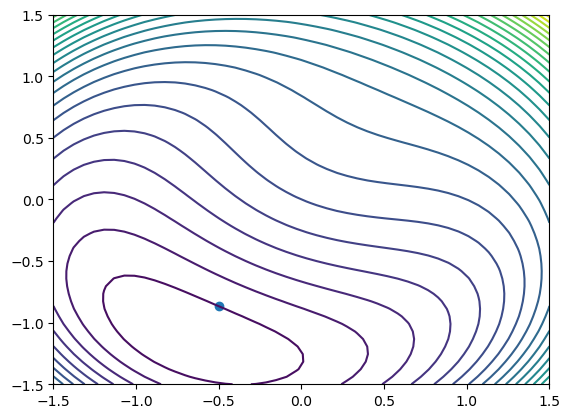

In [29]:
x = np.linspace(-1.5, 1.5, 50)
y = np.linspace(-1.5, 1.5, 50)
x,y = np.meshgrid(x,y)
sigma = 1
Lambda = 1
P = x + np.sqrt(3) * y + (sigma/2) * (x**2 + y**2 - 1)**2
plt.contour(x, y, P, 30)
plt.scatter(-0.5, -0.5*np.sqrt(3))

增广拉格朗日函数等高线

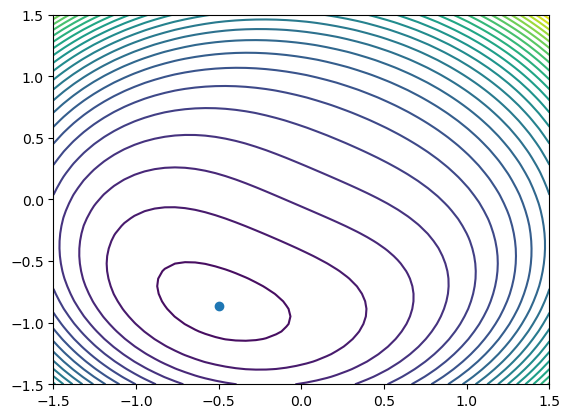

In [32]:
L = x + np.sqrt(3) * y + (sigma/2) * (x**2 + y**2 - 1)**2 + Lambda * (x**2 + y**2 - 1)
plt.contour(x, y, L, 30)
plt.scatter(-0.5, -0.5*np.sqrt(3))

这个例子说明增广拉格朗日函数的最优解更接近真实解。

### 一般约束优化问题的增广拉格朗日函数法

对于一般的约束优化问题：
$$
\min \quad f(x),\\
s.t.\quad c_i(x)=0,i\in\varepsilon,\tag{7.2.8}\\
\quad\quad c_i(x)\leq 0,i\in\mathcal{I}
$$


#### 增广拉格朗日函数
问题(7.2.8), 我们引入松弛变量可以得到如下等式:
$$
\min_{x,s}\quad f(x),\\
s.t.\quad  c_{i}(x)=0,\quad i\in\varepsilon,\\
\qquad\quad\qquad c_{i}(x)+s_i=0,\quad i\in\mathcal{I},\\
\qquad s_{i}\geq 0,\quad i\in\mathcal{I}
$$
构造增广拉格朗日函数如下:
$$
L_{\sigma}(x,s,\lambda,\mu)=f(x)+\sum_{i\in\varepsilon}\lambda_{i}c_{i}(x)+\sum_{i\in\mathcal{I}}\mu_{i}(c_{i}(x)+s_i)+\frac{\sigma}{2}p(x,s),\\
s_{i}\geq 0,\quad i\in\mathcal{I}
$$
在第$k$步的迭代中, 给定乘子$\lambda^k,\mu^k$和罚因子$\sigma_{k}$, 我们需要求解如下问题:
$$
\min_{x,s}\quad L_{\sigma_k}(x,s,\lambda^{k},\mu^{k}),\quad s.t. \quad s\geq 0
$$
得到$x^{k+1},s^{k+1}$.

这种算法相比之前考虑到了约束违反度:
$$
v_k(x^{k+1})=\sqrt{\sum_{i\in\varepsilon}c_i^2(x^{k+1})+\sum_{i\in\mathcal{I}}(c_i(x^{k+1})+s_i^{k+1})^2}
$$

![](2.png)

在这个算法中, 每次计算子问题的近似解$x^{k+1}$后, 算法需要判断约束违反度$v_k(x^{k+1})$是否满足精度要求, 如果满足就进行乘子更新
$$
\lambda_{i}^{k+1}=\lambda_i^k+\sigma_kc_i(x^{k+1}),\\
\mu_i^{k+1}=\max\{\mu_{i}^k+\sigma_kc_i(x^{k+1}),0\}
$$
如若不然, 则不进行乘子更新, 并适当增大罚因子一遍得到约束违反度更小的解

### 基追踪问题的增广拉格朗日函数法
基追踪(BP)问题为:
$$
\min_{x\in R^n}\quad ||x||_1,\quad s.t.\quad Ax=b
$$
引入罚因子$\sigma$和乘子$\lambda$, 问题的增广拉格朗日函数为:
$$
L_{\sigma}(x,\lambda)=||x||_{1}+\lambda^T(Ax-b)+\frac{\sigma}{2}||Ax-b||_2^2
$$
在第$k$步的迭代中, 更新格式为:
$$
\begin{align}
    &x^{k+1} = \arg\min_{x\in R^n}L_{\sigma}(x,\lambda^k)=\arg\min_{x\in R^n}\{||x||_1+\frac{\sigma}{2}||Ax-b+\frac{\lambda^k}{\sigma}||^2_2\}\\
    &\lambda^{k+1}=\lambda^k+\sigma(Ax^{k+1}-b)
\end{align}
$$
满足上式的$x^{k+1}$往往不是能显示得到, 可以使用之前介绍过的次梯度的迭代来计算.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
m = 10
n = 5
A = np.random.randint(1, 10, (m,n))
b = np.random.randint(1, 10, m)

sigma = 1

L = lambda x, Lambda: np.max(x) + np.dot(Lambda, A@x-b) + (sigma/2)*np.dot(A@x-b, A@x-b)

In [5]:
class Lagrange:
    def __init__(self, step) -> None:
        self.step = step
    

array([2, 5, 2, 3, 7, 2, 1, 1, 6, 9])

In [13]:
x = np.linspace(1, 10, n)
Lambda = np.linspace(1, 10, m)

In [16]:
L(x, Lambda)

82847.625